# IMPORTING ESSENTIAL LIBRARIES

In [1]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,f_classif       
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# READING CSV FILE

In [2]:
data=pd.read_csv('creditcard.csv')  #reading creditcard.csv file as data
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# CONVERTING IT TO DATAFRAME

In [3]:
df=pd.DataFrame(data)  #converting data into dataframe
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


# DESCRIPTIVE ANALYSIS

In [4]:
df.head(2)                  #first 2 entries of dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [5]:
df.tail(2)                   #last 2 entries of dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
df.shape #provides total no.of rows and columns in the df

(30000, 25)

In [7]:
df.size

750000

In [8]:
df.index

RangeIndex(start=0, stop=30000, step=1)

In [9]:
df.columns   #all columns names in dataframe

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
df.info()  #provides all infomation about a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [11]:
df.describe()     #provides statistical measures of every numerical columns 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# handling missing values
## NaN, Null

In [12]:
df.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()  # checking for totalno.of null value values.   a missing or unknown value

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [15]:
df.isna().sum()    # checking for totalno.of nan value values. an undefined value or value that cannot be represented, especially results of floating-point calculations.

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## drop==>null values
- df.dropna()
##  fill 
```
- df.fillna(strategy=mean())                         # fIll missing values with mean
- df.isna().sum()                                    # Count of missing values
- df.dropna()                                        # Drop missing rows
-df.fillna(0)                                        # Fill missing with 0
- df['column_name'].fillna(df['column_name'].mean(), inplace=True)
```

# Handling duplicate values


In [16]:
#Handling duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

# converting dtype using .astype

In [19]:
df['LIMIT_BAL']=df['LIMIT_BAL'].astype('float')

In [20]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                       int64
BILL_AMT2                       int64
BILL_AMT3                       int64
BILL_AMT4                       int64
BILL_AMT5                       int64
BILL_AMT6                       int64
PAY_AMT1                        int64
PAY_AMT2                        int64
PAY_AMT3                        int64
PAY_AMT4                        int64
PAY_AMT5                        int64
PAY_AMT6                        int64
default payment next month      int64
dtype: object

# Renaming columns for better understanding of data

In [21]:
df=df.rename(columns={'PAY_0':'SEP_PAY'})

In [22]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [23]:
df=df.rename(columns={'PAY_2':'AUG_PAY','PAY_3':'JUL_PAY','PAY_4':'JUN_PAY','PAY_5':'MAY_PAY','PAY_6':'APR_PAY'})
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [24]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEP_PAY',
       'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [25]:
df=df.rename(columns={'BILL_AMT1':'SEP_BILL','BILL_AMT2':'AUG_BILL','BILL_AMT3':'JUL_BILL','BILL_AMT4':'JUN_BILL','BILL_AMT5':'MAY_BILL','BILL_AMT6':'APR_BILL'})

In [26]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEP_PAY',
       'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL',
       'AUG_BILL', 'JUL_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [27]:
df=df.rename(columns={'PAY_AMT1':'SEP_PAYMENT','PAY_AMT2':'AUG_PAYMENT','PAY_AMT3':'JUL_PAYMENT','PAY_AMT4':'JUN_PAYMENT','PAY_AMT5':'MAY_PAYMENT','PAY_AMT6':'APR_PAYMENT'})

In [28]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEP_PAY',
       'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL',
       'AUG_BILL', 'JUL_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL',
       'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT', 'JUN_PAYMENT',
       'MAY_PAYMENT', 'APR_PAYMENT', 'default payment next month'],
      dtype='object')

In [29]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# replacing values inside columns for better understanding


In [30]:
#replacing values inside columns
df.replace({'SEX':{1:'M',2:'F'}},inplace=True)

In [31]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,default payment next month
0,1,20000.0,F,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000.0,F,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000.0,F,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000.0,F,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000.0,M,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000.0,M,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000.0,M,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000.0,M,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [32]:
df.replace({'MARRIAGE':{1:'MARRIED',2:'SINGLE',3:'OTHERS'}},inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,default payment next month
0,1,20000.0,F,2,MARRIED,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000.0,F,2,SINGLE,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000.0,F,2,SINGLE,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000.0,F,2,MARRIED,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000.0,M,2,MARRIED,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,MARRIED,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000.0,M,3,SINGLE,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000.0,M,2,SINGLE,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000.0,M,3,MARRIED,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [33]:
df.replace({'EDUCATION':{1:'UG',2:'PG',3:'HIGH_SCHOOL',4:'OTHERS'}},inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,default payment next month
0,1,20000.0,F,PG,MARRIED,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000.0,F,PG,SINGLE,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000.0,F,PG,SINGLE,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000.0,F,PG,MARRIED,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000.0,M,PG,MARRIED,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,HIGH_SCHOOL,MARRIED,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000.0,M,HIGH_SCHOOL,SINGLE,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000.0,M,PG,SINGLE,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000.0,M,HIGH_SCHOOL,MARRIED,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [34]:
df.replace({'default payment next month':{1:'YES',0:'NO'}},inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,default payment next month
0,1,20000.0,F,PG,MARRIED,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,YES
1,2,120000.0,F,PG,SINGLE,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,YES
2,3,90000.0,F,PG,SINGLE,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,NO
3,4,50000.0,F,PG,MARRIED,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,NO
4,5,50000.0,M,PG,MARRIED,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,HIGH_SCHOOL,MARRIED,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,NO
29996,29997,150000.0,M,HIGH_SCHOOL,SINGLE,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,NO
29997,29998,30000.0,M,PG,SINGLE,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,YES
29998,29999,80000.0,M,HIGH_SCHOOL,MARRIED,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,YES


In [35]:
df=df.rename(columns={'default payment next month':'target'})
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEP_PAY',
       'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL',
       'AUG_BILL', 'JUL_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL',
       'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT', 'JUN_PAYMENT',
       'MAY_PAYMENT', 'APR_PAYMENT', 'target'],
      dtype='object')

# Counting y variable counts

In [36]:
target_value=df['target'].value_counts() # Counting y variable counts
target_value

target
NO     23364
YES     6636
Name: count, dtype: int64

In [37]:
value_count=df['SEX'].value_counts()
print(value_count)

SEX
F    18112
M    11888
Name: count, dtype: int64


In [38]:
E=df['EDUCATION'].value_counts()
E

EDUCATION
PG             14030
UG             10585
HIGH_SCHOOL     4917
5                280
OTHERS           123
6                 51
0                 14
Name: count, dtype: int64

# replacing the numericals 0,5,6 

In [39]:
df.replace({'EDUCATION':{0:'PH.D',5:'M.PHIL',6:'B.TECH'}},inplace=True)


In [40]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
0,1,20000.0,F,PG,MARRIED,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,YES
1,2,120000.0,F,PG,SINGLE,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,YES
2,3,90000.0,F,PG,SINGLE,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,NO
3,4,50000.0,F,PG,MARRIED,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,NO
4,5,50000.0,M,PG,MARRIED,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,NO


In [41]:
E=df['EDUCATION'].value_counts()
E

EDUCATION
PG             14030
UG             10585
HIGH_SCHOOL     4917
M.PHIL           280
OTHERS           123
B.TECH            51
PH.D              14
Name: count, dtype: int64

In [42]:
df['EDUCATION'].unique()

array(['PG', 'UG', 'HIGH_SCHOOL', 'M.PHIL', 'OTHERS', 'B.TECH', 'PH.D'],
      dtype=object)

# filter,sort,grouping,apply functions

In [43]:
filter=df[df['SEX']=='F']
filter

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
0,1,20000.0,F,PG,MARRIED,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,YES
1,2,120000.0,F,PG,SINGLE,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,YES
2,3,90000.0,F,PG,SINGLE,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,NO
3,4,50000.0,F,PG,MARRIED,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,NO
7,8,100000.0,F,PG,SINGLE,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29180,29181,140000.0,F,PG,MARRIED,60,2,2,0,0,...,114789,115590,118221,0,5600,6000,4200,4500,4600,YES
29181,29182,170000.0,F,HIGH_SCHOOL,MARRIED,57,0,0,0,0,...,164366,124387,120529,7300,8000,7800,4600,5000,5100,NO
29182,29183,280000.0,F,UG,MARRIED,56,-2,-2,-2,-2,...,12492,3464,3936,4811,9957,12492,3469,3936,3845,NO
29185,29186,50000.0,F,HIGH_SCHOOL,SINGLE,55,2,0,0,0,...,17087,17119,17602,1243,1267,1580,612,758,700,NO


In [44]:
edu=df[df['EDUCATION']=='UG']
edu

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
5,6,50000.0,M,UG,SINGLE,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,NO
6,7,500000.0,M,UG,SINGLE,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,NO
11,12,260000.0,F,UG,SINGLE,51,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,NO
14,15,250000.0,M,UG,SINGLE,29,0,0,0,0,...,59696,56875,55512,3000,3000,3000,3000,3000,3000,NO
16,17,20000.0,M,UG,SINGLE,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,29987,360000.0,M,UG,SINGLE,35,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,NO
29987,29988,130000.0,M,UG,SINGLE,34,0,0,0,0,...,108047,93708,97353,3000,2000,93000,4000,5027,4005,NO
29988,29989,250000.0,M,UG,MARRIED,34,0,0,0,0,...,245750,175005,179687,65000,8800,9011,6000,7000,6009,NO
29989,29990,150000.0,M,UG,SINGLE,35,-1,-1,-1,-1,...,780,0,0,9054,0,783,0,0,0,NO


In [45]:
a=df[(df['EDUCATION']=='UG') & ( df['SEX']=='F' ) & (df['MARRIAGE']=='MARRIED')]
a

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
18,19,360000.0,F,UG,MARRIED,49,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,NO
23,24,450000.0,F,UG,MARRIED,40,-2,-2,-2,-2,...,560,0,0,19428,1473,560,0,0,1128,YES
55,56,500000.0,F,UG,MARRIED,45,-2,-2,-2,-2,...,0,151,2530,3640,162,0,151,2530,0,NO
77,78,300000.0,F,UG,MARRIED,45,-1,-1,-1,-1,...,291,291,291,291,291,291,291,291,291,NO
86,87,360000.0,F,UG,MARRIED,45,-1,-1,2,0,...,390,390,390,1170,0,0,390,390,390,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29143,29144,200000.0,F,UG,MARRIED,52,-1,-1,-1,-1,...,3175,153,0,317,1169,3178,153,0,0,NO
29154,29155,140000.0,F,UG,MARRIED,56,3,2,2,3,...,450,1450,1150,0,0,0,1000,0,0,YES
29159,29160,150000.0,F,UG,MARRIED,55,-1,-1,-1,-1,...,32353,25007,16708,18734,18040,32353,25000,16708,168381,NO
29173,29174,360000.0,F,UG,MARRIED,64,-2,-2,-2,-2,...,0,5640,0,4900,0,0,5640,0,0,NO


In [46]:
f1 = df[(df['EDUCATION'] == 'PG') & (df['MARRIAGE'] == 'MARRIED')]
f1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
0,1,20000.0,F,PG,MARRIED,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,YES
3,4,50000.0,F,PG,MARRIED,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,NO
4,5,50000.0,M,PG,MARRIED,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,NO
21,22,120000.0,F,PG,MARRIED,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,YES
33,34,500000.0,F,PG,MARRIED,54,-2,-2,-2,-2,...,7521,71439,8981,4152,22827,7521,71439,981,51582,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29982,29983,90000.0,M,PG,MARRIED,36,0,0,0,0,...,11328,12036,14329,1500,1500,1500,1200,2500,0,YES
29983,29984,20000.0,M,PG,MARRIED,44,-2,-2,-2,-2,...,2882,9235,1719,2890,2720,2890,9263,1824,1701,NO
29990,29991,140000.0,M,PG,MARRIED,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,NO
29991,29992,210000.0,M,PG,MARRIED,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,YES


In [47]:
#sorting
s=df.sort_values(by='AGE')
s

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
7141,7142,30000.0,F,PG,SINGLE,21,-2,-2,-2,-2,...,4311,1551,0,780,3260,4311,1551,0,0,NO
27662,27663,20000.0,F,PG,SINGLE,21,-1,-1,2,2,...,0,0,0,780,0,0,0,0,0,NO
8490,8491,10000.0,M,HIGH_SCHOOL,SINGLE,21,0,0,2,0,...,6154,6280,0,2400,0,0,126,0,0,NO
12556,12557,20000.0,F,PG,MARRIED,21,1,-2,-1,-1,...,0,0,0,0,289,0,0,0,0,YES
1471,1472,20000.0,M,PG,SINGLE,21,0,0,2,0,...,20000,0,0,5000,0,0,0,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29175,29176,160000.0,F,HIGH_SCHOOL,MARRIED,74,0,0,0,-1,...,16905,0,19789,3783,2268,16905,0,19789,26442,NO
246,247,250000.0,F,PG,MARRIED,75,0,-1,-1,-1,...,1010,5572,794,1631,1536,1010,5572,794,1184,NO
25141,25142,210000.0,M,PG,MARRIED,75,0,0,0,0,...,203776,205901,210006,9700,8810,9000,7300,7500,7600,NO
25136,25137,180000.0,M,UG,MARRIED,75,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,YES


In [48]:
#grouping and aggrecate sum,max,min,avg,count
grouping=df.groupby('MARRIAGE')['LIMIT_BAL'].mean()
grouping

MARRIAGE
0          132962.962963
MARRIED    182200.893184
OTHERS      98080.495356
SINGLE     156413.660737
Name: LIMIT_BAL, dtype: float64

In [49]:
#df.replace({0:'DIVORCED'},inplace=True)   #directly modifying df

In [50]:
df.replace({0:0},inplace=True)

In [51]:
grouping=df.groupby('MARRIAGE')['LIMIT_BAL'].mean()
grouping

MARRIAGE
0          132962.962963
MARRIED    182200.893184
OTHERS      98080.495356
SINGLE     156413.660737
Name: LIMIT_BAL, dtype: float64

In [52]:
g=df.groupby('SEX')['LIMIT_BAL'].min()
g

SEX
F    10000.0
M    10000.0
Name: LIMIT_BAL, dtype: float64

In [53]:
h=df.groupby('SEX')['LIMIT_BAL'].count()
h

SEX
F    18112
M    11888
Name: LIMIT_BAL, dtype: int64

# Creating new column by applying lamba function

In [54]:
df['LIMIT_BAL1']=df['LIMIT_BAL'].apply(lambda x: x+1000)

In [55]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target,LIMIT_BAL1
0,1,20000.0,F,PG,MARRIED,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,YES,21000.0
1,2,120000.0,F,PG,SINGLE,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,YES,121000.0
2,3,90000.0,F,PG,SINGLE,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,NO,91000.0
3,4,50000.0,F,PG,MARRIED,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,NO,51000.0
4,5,50000.0,M,PG,MARRIED,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,NO,51000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,HIGH_SCHOOL,MARRIED,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,NO,221000.0
29996,29997,150000.0,M,HIGH_SCHOOL,SINGLE,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,NO,151000.0
29997,29998,30000.0,M,PG,SINGLE,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,YES,31000.0
29998,29999,80000.0,M,HIGH_SCHOOL,MARRIED,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,YES,81000.0


# Dropping a column

In [56]:
df=df.drop('LIMIT_BAL1',axis=1) #axis=0 row, #axis=1 dropping coulmn
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
0,1,20000.0,F,PG,MARRIED,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,YES
1,2,120000.0,F,PG,SINGLE,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,YES
2,3,90000.0,F,PG,SINGLE,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,NO
3,4,50000.0,F,PG,MARRIED,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,NO
4,5,50000.0,M,PG,MARRIED,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,HIGH_SCHOOL,MARRIED,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,NO
29996,29997,150000.0,M,HIGH_SCHOOL,SINGLE,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,NO
29997,29998,30000.0,M,PG,SINGLE,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,YES
29998,29999,80000.0,M,HIGH_SCHOOL,MARRIED,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,YES


In [57]:
df.describe()          #full descriptive statistics

,ID,LIMIT_BAL,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEP_BILL,...,JUL_BILL,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


# Statistical analysis

In [58]:
a=df['LIMIT_BAL'].mean()
a

np.float64(167484.32266666667)

In [59]:
b=df['ID'].mean()
b

np.float64(15000.5)

In [60]:
c=df['AGE'].std()
c

np.float64(9.217904068090188)

In [61]:
d=df['AGE'].median()
d

np.float64(34.0)

In [62]:
e=df['LIMIT_BAL'].median()
e

np.float64(140000.0)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30000 non-null  int64  
 1   LIMIT_BAL    30000 non-null  float64
 2   SEX          30000 non-null  object 
 3   EDUCATION    30000 non-null  object 
 4   MARRIAGE     30000 non-null  object 
 5   AGE          30000 non-null  int64  
 6   SEP_PAY      30000 non-null  int64  
 7   AUG_PAY      30000 non-null  int64  
 8   JUL_PAY      30000 non-null  int64  
 9   JUN_PAY      30000 non-null  int64  
 10  MAY_PAY      30000 non-null  int64  
 11  APR_PAY      30000 non-null  int64  
 12  SEP_BILL     30000 non-null  int64  
 13  AUG_BILL     30000 non-null  int64  
 14  JUL_BILL     30000 non-null  int64  
 15  JUN_BILL     30000 non-null  int64  
 16  MAY_BILL     30000 non-null  int64  
 17  APR_BILL     30000 non-null  int64  
 18  SEP_PAYMENT  30000 non-null  int64  
 19  AUG_

In [64]:
num_cols=df.select_dtypes(include='number').columns
num_cols

Index(['ID', 'LIMIT_BAL', 'AGE', 'SEP_PAY', 'AUG_PAY', 'JUL_PAY', 'JUN_PAY',
       'MAY_PAY', 'APR_PAY', 'SEP_BILL', 'AUG_BILL', 'JUL_BILL', 'JUN_BILL',
       'MAY_BILL', 'APR_BILL', 'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT',
       'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT'],
      dtype='object')

In [65]:
#df.skew()

In [66]:
df['LIMIT_BAL'].skew()

np.float64(0.992866960519544)

In [67]:
sq=df.select_dtypes(include='number').skew()
sq

ID              0.000000
LIMIT_BAL       0.992867
AGE             0.732246
SEP_PAY         0.731975
AUG_PAY         0.790565
JUL_PAY         0.840682
JUN_PAY         0.999629
MAY_PAY         1.008197
APR_PAY         0.948029
SEP_BILL        2.663861
AUG_BILL        2.705221
JUL_BILL        3.087830
JUN_BILL        2.821965
MAY_BILL        2.876380
APR_BILL        2.846645
SEP_PAYMENT    14.668364
AUG_PAYMENT    30.453817
JUL_PAYMENT    17.216635
JUN_PAYMENT    12.904985
MAY_PAYMENT    11.127417
APR_PAYMENT    10.640727
dtype: float64

In [68]:
#our data is skewed
#-0.5 to 0.5 is correct value... max is 1...otherwise our data is skewed and we need to remove it using algorithms

In [69]:
k=df.select_dtypes(include='number').kurt()
k

ID               -1.200000
LIMIT_BAL         0.536263
AGE               0.044303
SEP_PAY           2.720715
AUG_PAY           1.570418
JUL_PAY           2.084436
JUN_PAY           3.496983
MAY_PAY           3.989748
APR_PAY           3.426534
SEP_BILL          9.806289
AUG_BILL         10.302946
JUL_BILL         19.783255
JUN_BILL         11.309325
MAY_BILL         12.305881
APR_BILL         12.270705
SEP_PAYMENT     415.254743
AUG_PAYMENT    1641.631911
JUL_PAYMENT     564.311229
JUN_PAYMENT     277.333768
MAY_PAYMENT     180.063940
APR_PAYMENT     167.161430
dtype: float64

# correlation of data columns ===>correlation analysis
### -vely correlated, +vely correlated===>heatmap

In [70]:
co=df.select_dtypes(include='number').corr()
co

,ID,LIMIT_BAL,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEP_BILL,...,JUL_BILL,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT
ID,1.000000,0.026179,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,...,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000
LIMIT_BAL,0.026179,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.018678,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
SEP_PAY,-0.030575,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
AUG_PAY,-0.011215,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
JUL_PAY,-0.018494,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
JUN_PAY,-0.002735,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
MAY_PAY,-0.022199,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027
APR_PAY,-0.020270,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,...,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299
SEP_BILL,0.019389,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,...,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341


In [71]:
import matplotlib.pyplot as plt

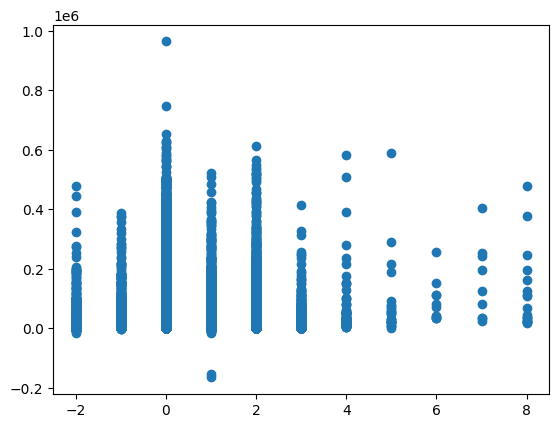

In [72]:
#plt.plot(df['SEX'],df['LIMIT_BAL'])
plt.scatter(df['SEP_PAY'],df['SEP_BILL'])
plt.show()


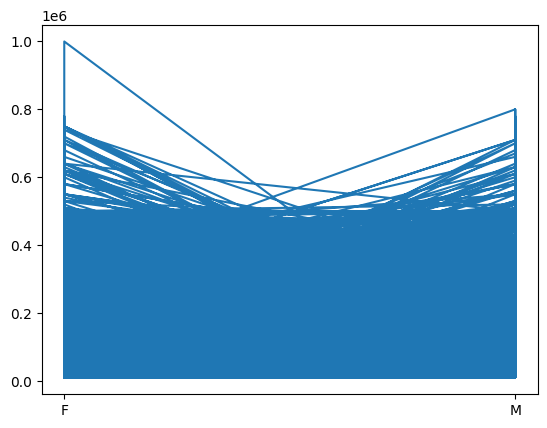

In [73]:
plt.plot(df['SEX'],df['LIMIT_BAL'])
plt.show()

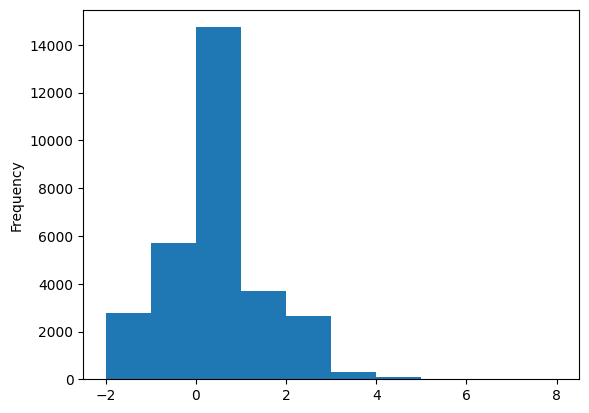

In [74]:
df['SEP_PAY'].plot(kind='hist')
plt.show()

<Axes: ylabel='Density'>

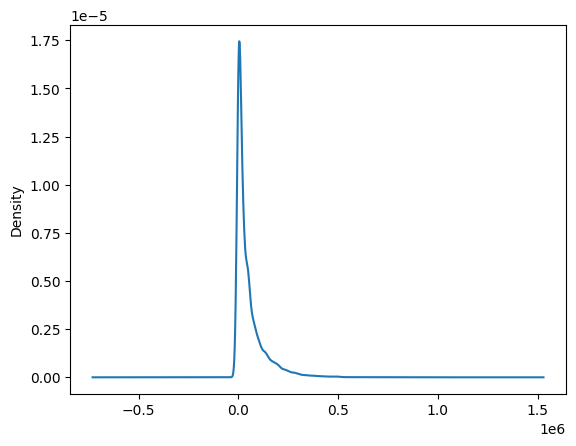

In [75]:
df['SEP_BILL'].plot(kind='density')

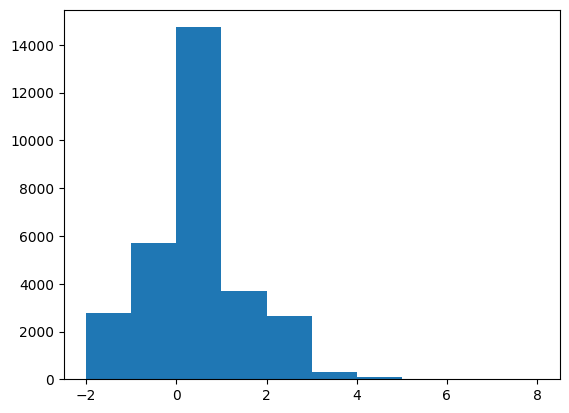

In [76]:
plt.hist(df['SEP_PAY'],bins=10)
plt.show()

# DETECTING OUTLIER USING BOX PLOT

In [77]:
import seaborn as sns

<Axes: >

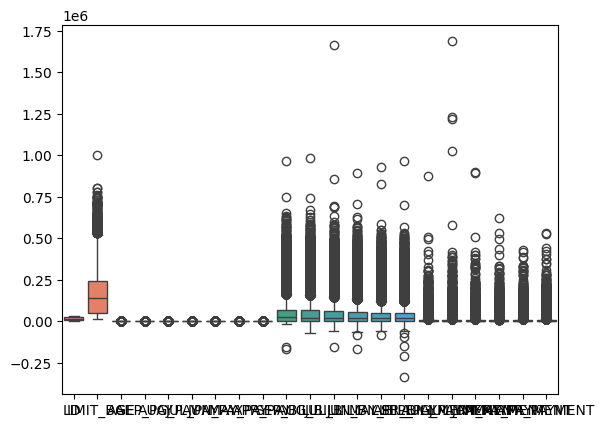

In [78]:
sns.boxplot(data=df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22052\1050677165.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4,5))


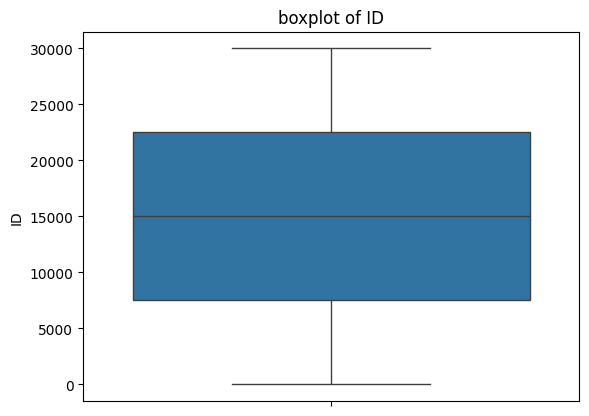

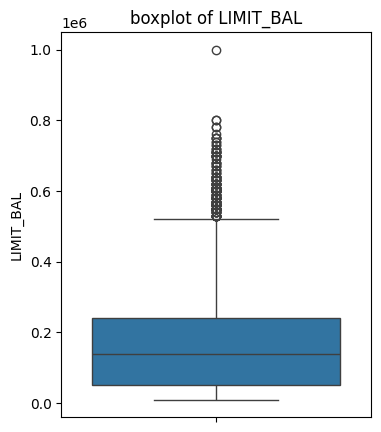

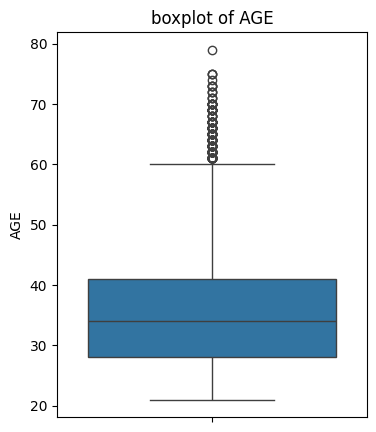

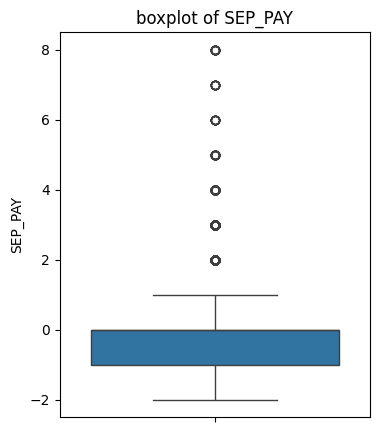

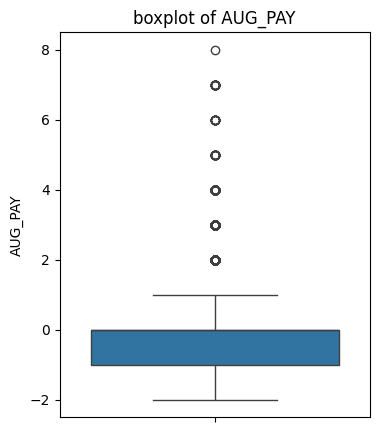

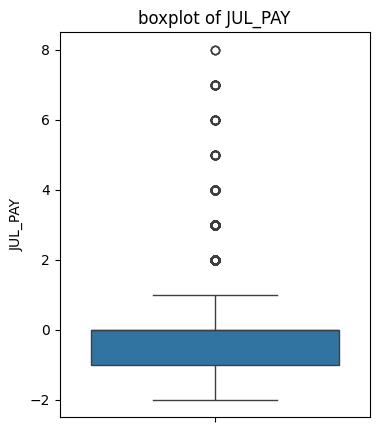

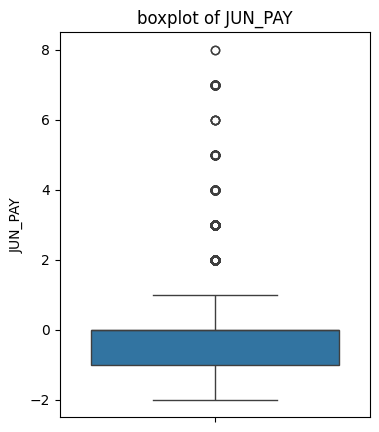

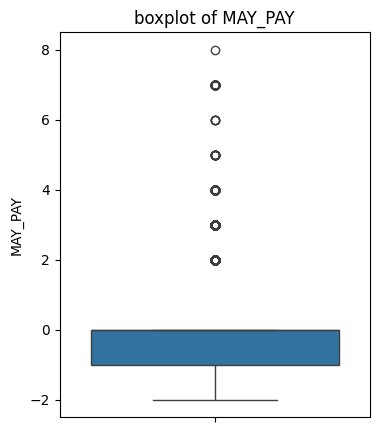

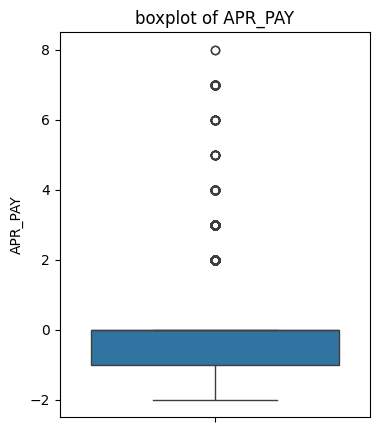

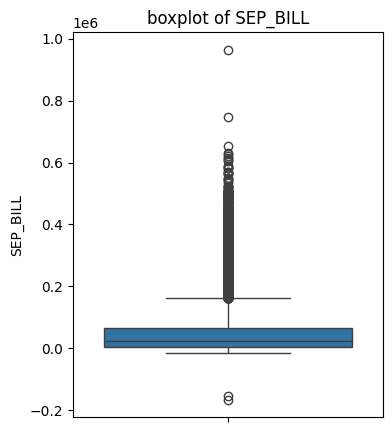

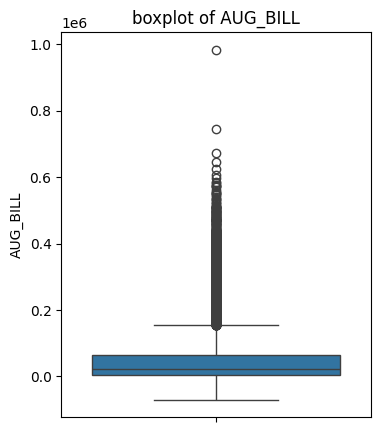

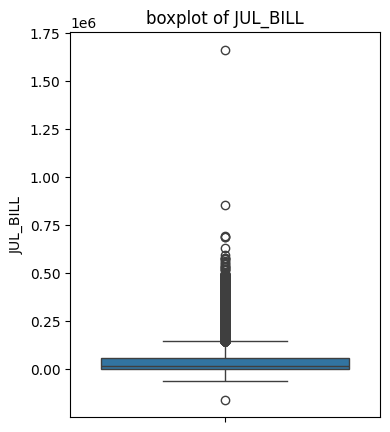

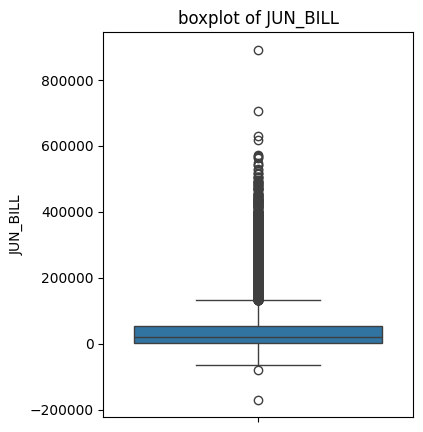

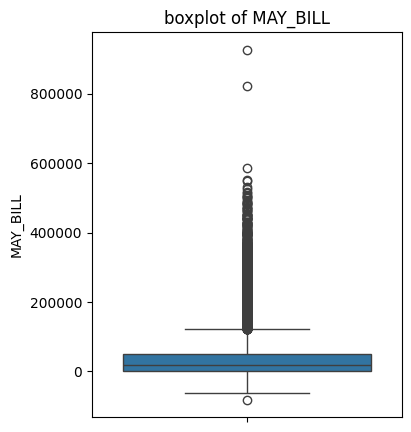

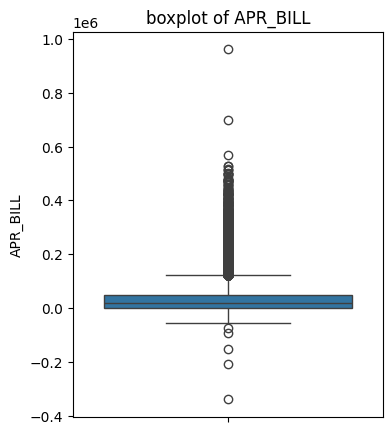

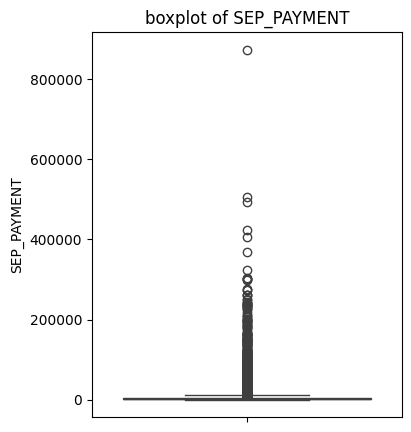

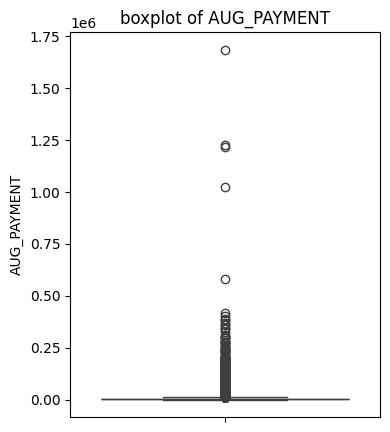

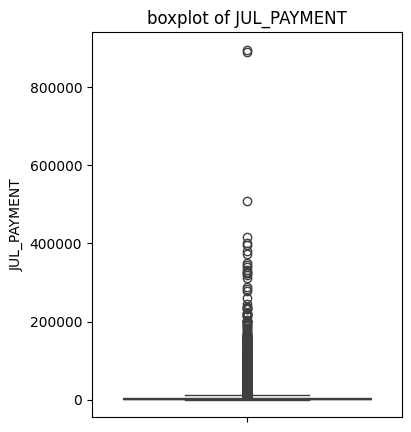

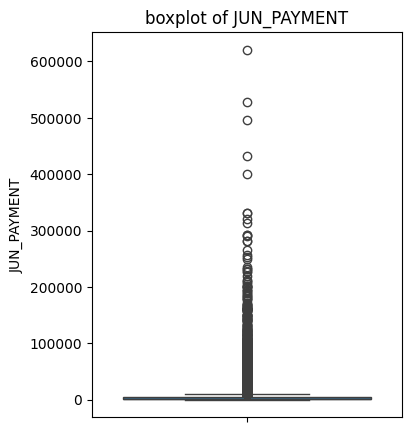

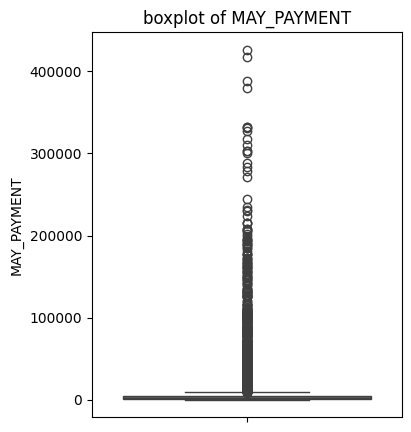

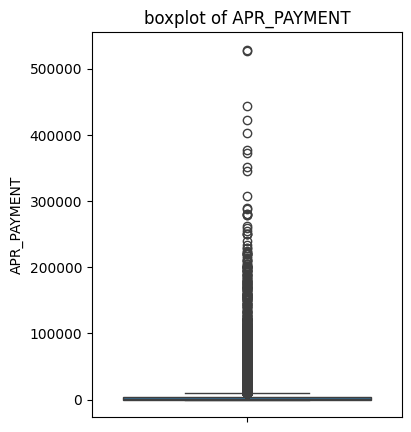

<Figure size 400x500 with 0 Axes>

In [79]:
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(y=df[col])
    plt.title(f'boxplot of {col}')
    plt.figure(figsize=(4,5))

# Caping/Imputing outlier data point using IQR

In [80]:
#calculate iqr
for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    #define bounds(lower and upper)
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    #removing outliers
    clean_data=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)][col]

In [81]:
df1=pd.DataFrame(clean_data)
df1

,APR_PAYMENT
0,0
1,2000
2,5000
3,1000
4,679
...,...
29995,1000
29996,0
29997,3100
29998,1804


In [82]:
clean_data

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: APR_PAYMENT, Length: 27042, dtype: int64

# using for loop we can only get the box plot for single column. so it is better to write funtion

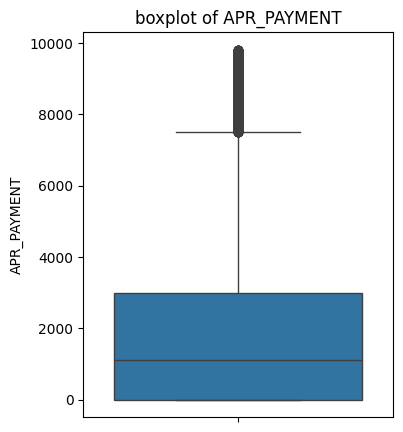

In [83]:
for col in df1.select_dtypes(include='number').columns:
    plt.figure(figsize=(4,5))
    sns.boxplot(y=df1[col])
    plt.title(f'boxplot of {col}')   

<Axes: ylabel='APR_PAYMENT'>

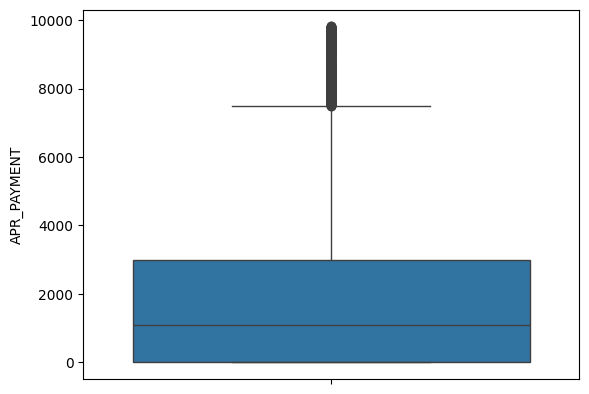

In [84]:
sns.boxplot(y=clean_data)

 # Function to apply IQR method to fix outliers


In [85]:
 # Function to apply IQR method to fix outliers
def fix_outliers_iqr(df):
    num=df.select_dtypes(include='number').columns
    for col in num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
# Replace outliers with the respective bounds
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df


In [86]:
df1=fix_outliers_iqr(df)
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
0,1,20000.0,F,PG,MARRIED,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,YES
1,2,120000.0,F,PG,SINGLE,26.0,-1.0,1.5,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,YES
2,3,90000.0,F,PG,SINGLE,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,NO
3,4,50000.0,F,PG,MARRIED,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,NO
4,5,50000.0,M,PG,MARRIED,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,HIGH_SCHOOL,MARRIED,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,NO
29996,29997,150000.0,M,HIGH_SCHOOL,SINGLE,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,NO
29997,29998,30000.0,M,PG,SINGLE,37.0,1.5,1.5,1.5,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,YES
29998,29999,80000.0,M,HIGH_SCHOOL,MARRIED,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,YES


<Axes: >

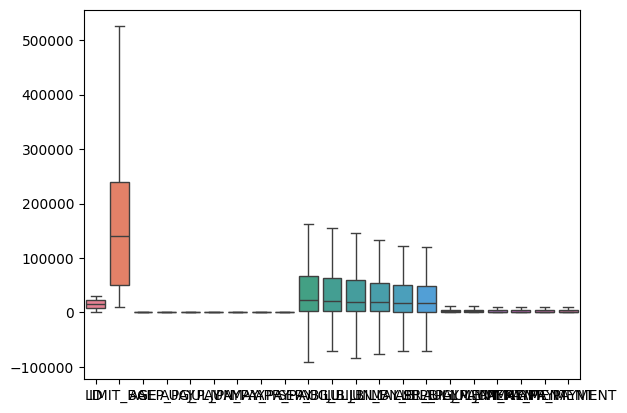

In [87]:
sns.boxplot(data=df1)

In [88]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEP_PAY',
       'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL',
       'AUG_BILL', 'JUL_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL',
       'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT', 'JUN_PAYMENT',
       'MAY_PAYMENT', 'APR_PAYMENT', 'target'],
      dtype='object')

# KURTOSIS
- Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur.
- Excess kurtosis is the tailedness of a distribution relative to a normal distribution.
-  Distributions with medium kurtosis (medium tails) are mesokurtic.
-  Distributions with low kurtosis (thin tails) are platykurtic

In [89]:
kurtosis_values = df1['AUG_PAY'].kurt()
kurtosis_values

np.float64(-0.28317190463616404)

# CORRELATION ANALYSIS OF ALL NUMERICAL COLUMN WITH PLOTTING HEATMAP

In [90]:
correl=df1['AUG_PAY'].corr(df1['AUG_BILL'])
correl

np.float64(0.34384890643629334)

In [91]:
df2= df.select_dtypes(include='number')
df2

,ID,LIMIT_BAL,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEP_BILL,...,JUL_BILL,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT
0,1,20000.0,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,3913.000,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,2682.000,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.000,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.000,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.000,...,35835.0,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,162389.375,...,146412.5,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.000,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,3565.000,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0
29998,29999,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.000,...,76304.0,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0


In [92]:
correl=df2.corr()
correl

,ID,LIMIT_BAL,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEP_BILL,...,JUL_BILL,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT
ID,1.000000,0.026428,0.019147,-0.032481,-0.010198,-0.014786,-0.003767,-0.022187,-0.017826,0.017410,...,0.022069,0.040608,0.015959,0.018622,0.010365,0.041859,0.078819,0.016662,0.012433,0.029365
LIMIT_BAL,0.026428,1.000000,0.144929,-0.281256,-0.308840,-0.296653,-0.275536,-0.254271,-0.237806,0.198285,...,0.197736,0.209352,0.211746,0.207354,0.343157,0.353506,0.358593,0.349563,0.354400,0.371924
AGE,0.019147,0.144929,1.000000,-0.047814,-0.059234,-0.060760,-0.058576,-0.062664,-0.055502,0.038029,...,0.034817,0.029304,0.026337,0.024887,0.038060,0.047249,0.039551,0.044055,0.040017,0.034892
SEP_PAY,-0.032481,-0.281256,-0.047814,1.000000,0.645076,0.559973,0.528837,0.503439,0.476768,0.251773,...,0.246216,0.241646,0.239012,0.234894,-0.102186,-0.095138,-0.087057,-0.067292,-0.061694,-0.076801
AUG_PAY,-0.010198,-0.308840,-0.059234,0.645076,1.000000,0.786833,0.694651,0.658172,0.615124,0.345197,...,0.333444,0.325990,0.320417,0.315323,-0.044281,-0.010027,-0.011084,0.002347,0.009338,-0.003035
JUL_PAY,-0.014786,-0.296653,-0.060760,0.559973,0.786833,1.000000,0.792073,0.705038,0.653343,0.319670,...,0.349417,0.343079,0.335284,0.327733,0.114352,-0.040379,0.000133,0.021869,0.028235,0.009207
JUN_PAY,-0.003767,-0.275536,-0.058576,0.528837,0.694651,0.792073,1.000000,0.820382,0.719471,0.319552,...,0.383900,0.379892,0.370541,0.360876,0.087344,0.126888,-0.016672,0.037965,0.055232,0.040393
MAY_PAY,-0.022187,-0.254271,-0.062664,0.503439,0.658172,0.705038,0.820382,1.000000,0.818823,0.318971,...,0.378484,0.414625,0.406531,0.391663,0.084345,0.107406,0.134246,0.022686,0.070511,0.063572
APR_PAY,-0.017826,-0.237806,-0.055502,0.476768,0.615124,0.653343,0.719471,0.818823,1.000000,0.316668,...,0.370129,0.401270,0.433413,0.419766,0.088892,0.091165,0.113354,0.156453,0.045744,0.078345
SEP_BILL,0.017410,0.198285,0.038029,0.251773,0.345197,0.319670,0.319552,0.318971,0.316668,1.000000,...,0.899177,0.852575,0.819291,0.793632,0.466516,0.424701,0.392170,0.403331,0.394699,0.379730


<Axes: >

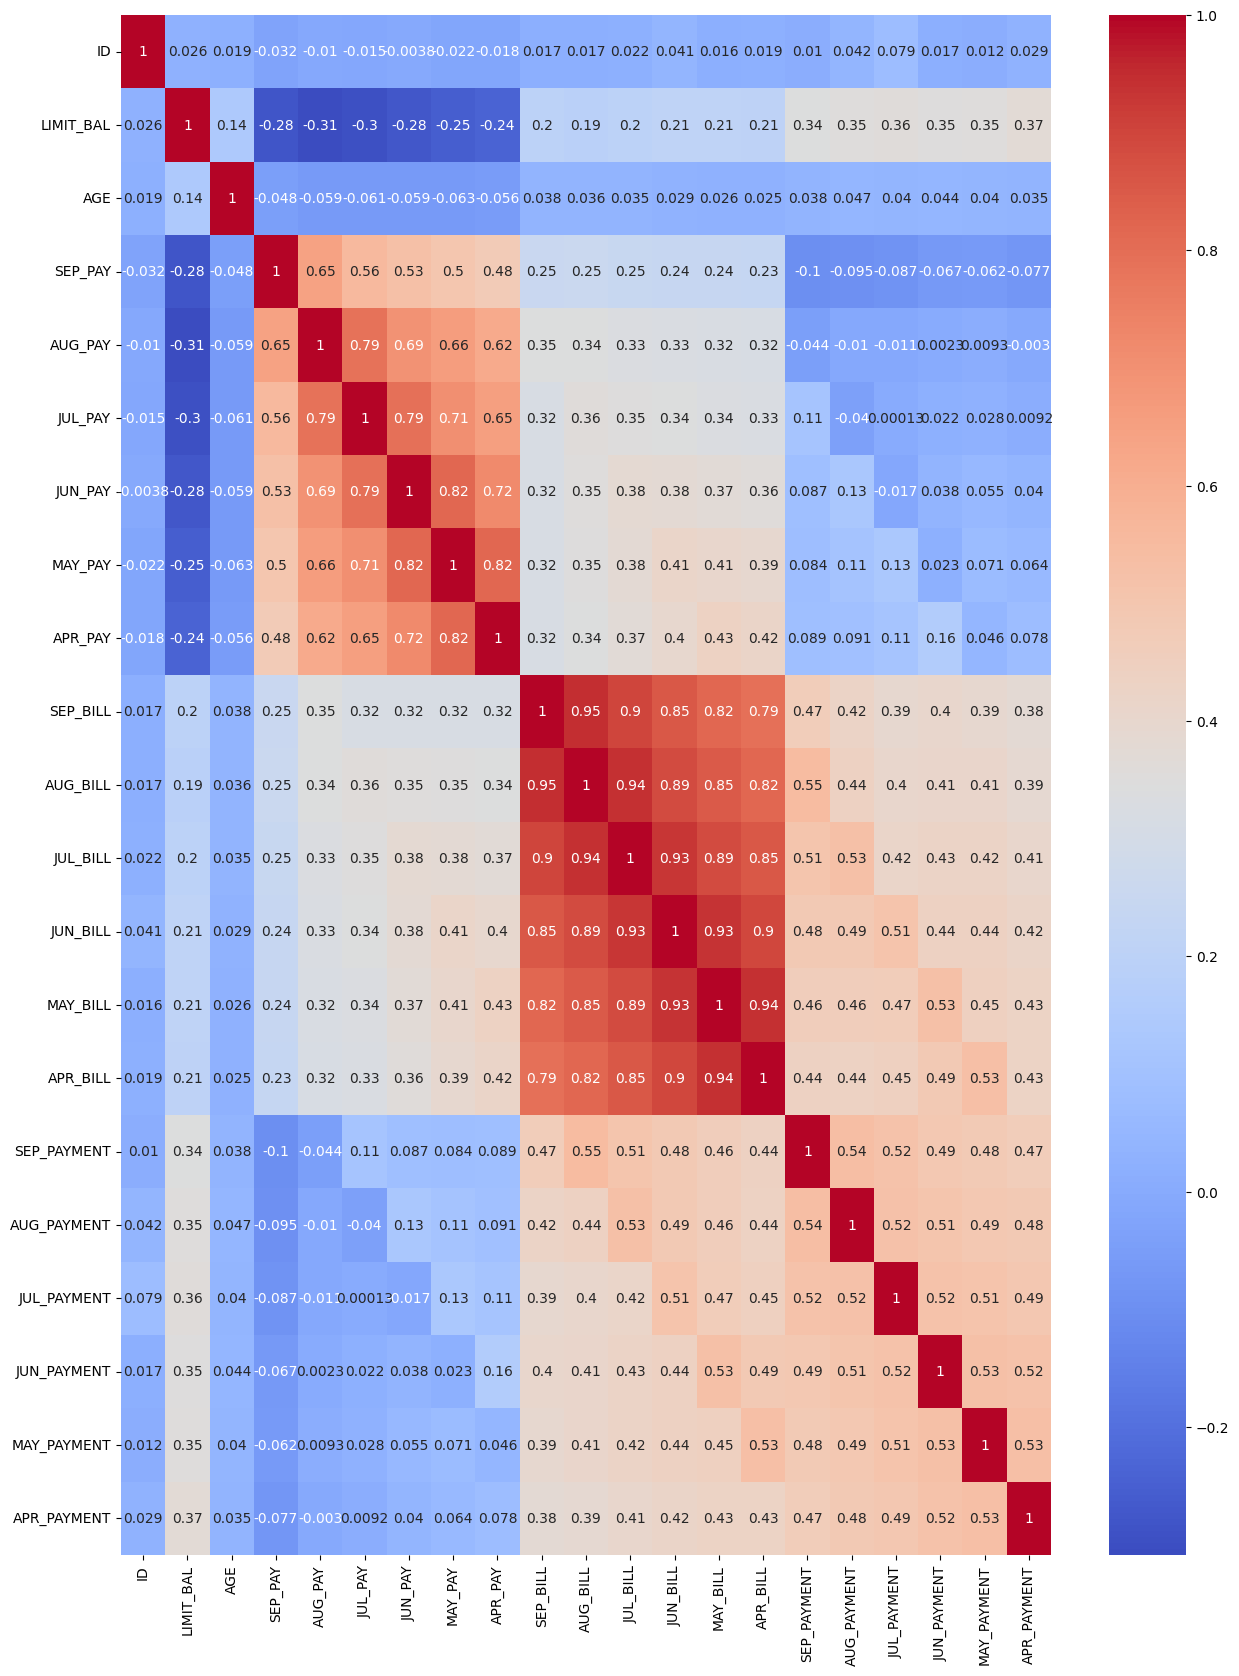

In [93]:
plt.figure(figsize=(15,20))
sns.heatmap(correl,annot=True,cmap='coolwarm')

<Axes: >

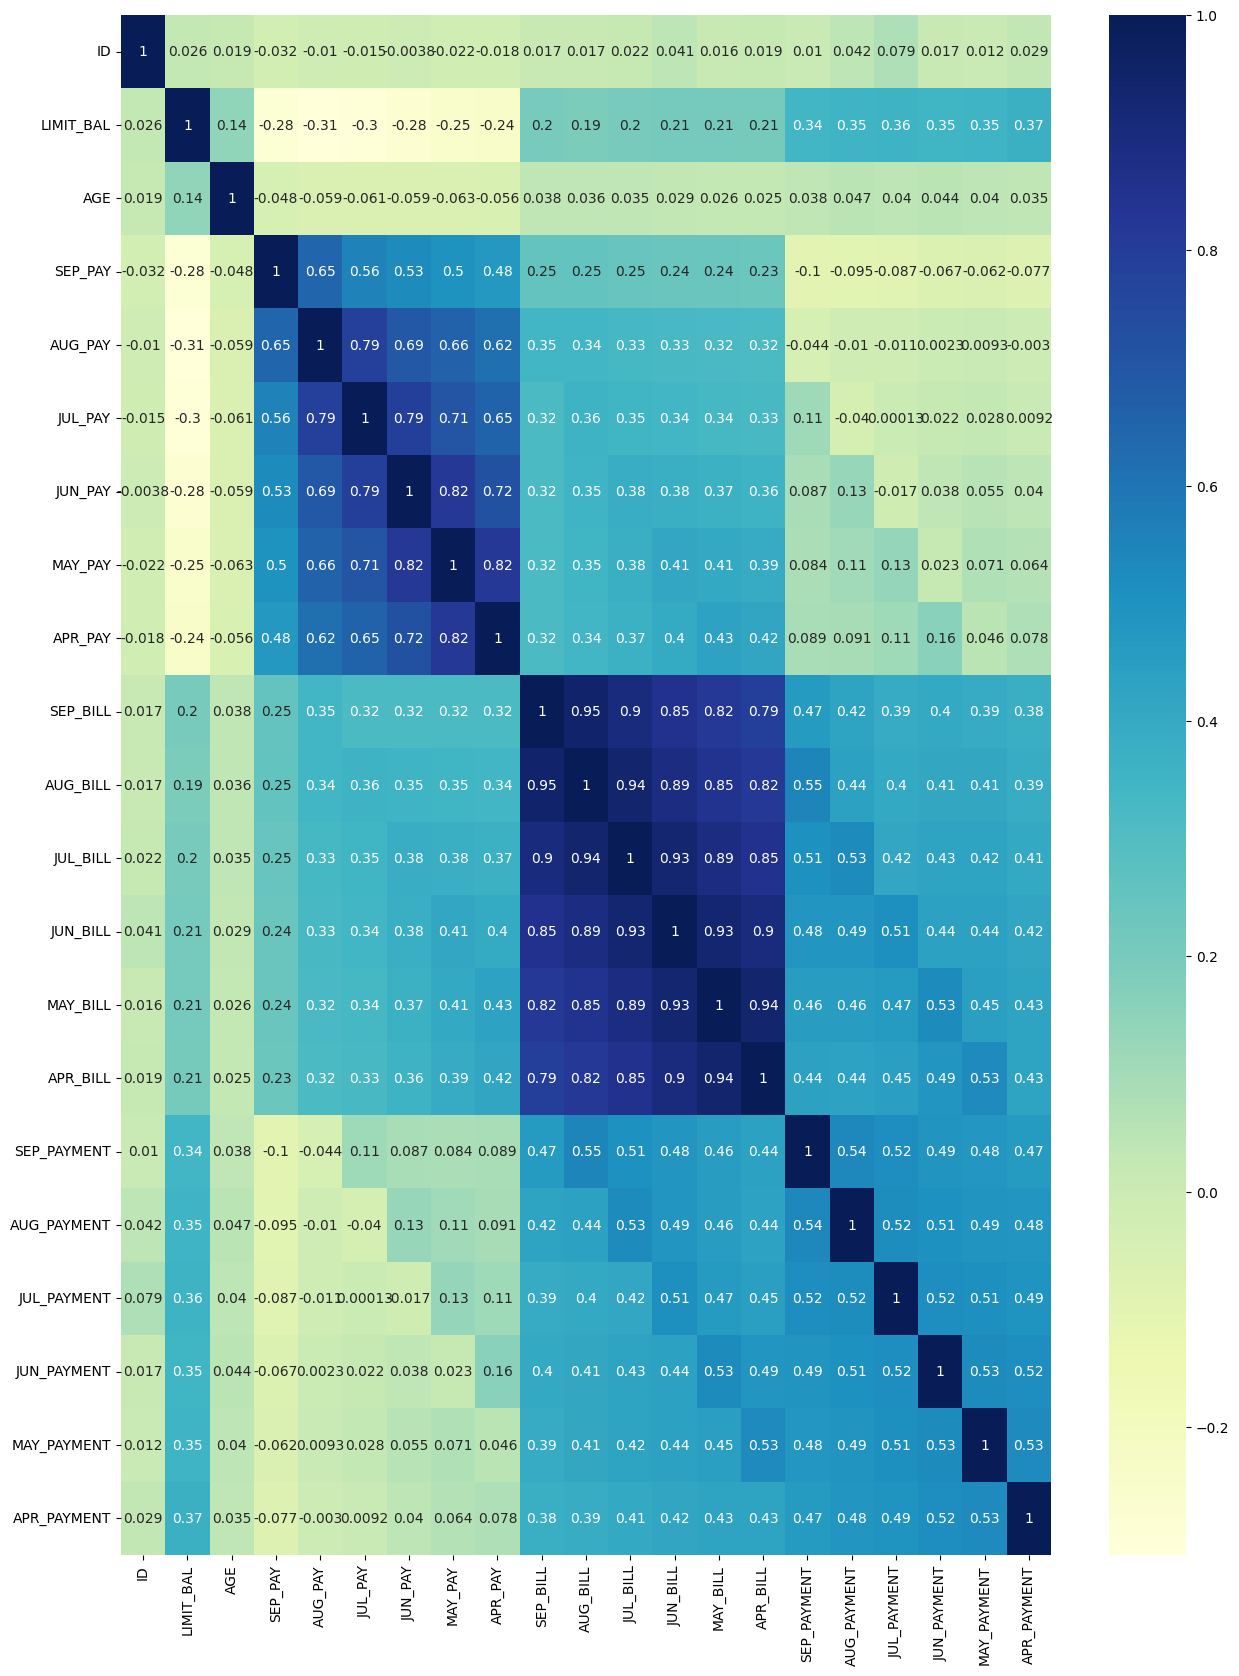

In [94]:
plt.figure(figsize=(15,20))
sns.heatmap(correl,annot=True,cmap='YlGnBu')

## SKEWNESS USING POWER TRANSFORMER FROM SKLEARN

In [95]:
df2.skew()

ID             0.000000
LIMIT_BAL      0.904504
AGE            0.654467
SEP_PAY       -0.224566
AUG_PAY       -0.015287
JUL_PAY       -0.024423
JUN_PAY       -0.075685
MAY_PAY       -0.128769
APR_PAY       -0.080431
SEP_BILL       1.194178
AUG_BILL       1.189649
JUL_BILL       1.184730
JUN_BILL       1.183997
MAY_BILL       1.184657
APR_BILL       1.199718
SEP_PAYMENT    1.032414
AUG_PAYMENT    1.113399
JUL_PAYMENT    1.200528
JUN_PAYMENT    1.176348
MAY_PAYMENT    1.183906
APR_PAYMENT    1.211015
dtype: float64

In [96]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [97]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [98]:
df_transformed.skew()

ID            -0.291081
LIMIT_BAL     -0.080029
AGE            0.033520
SEP_PAY       -0.012942
AUG_PAY        0.003610
JUL_PAY        0.011113
JUN_PAY        0.026121
MAY_PAY        0.041061
APR_PAY        0.041781
SEP_BILL      -2.186410
AUG_BILL      -1.409826
JUL_BILL      -1.711258
JUN_BILL      -1.450557
MAY_BILL      -1.351760
APR_BILL      -1.084529
SEP_PAYMENT   -0.486386
AUG_PAYMENT   -0.467856
JUL_PAYMENT   -0.430287
JUN_PAYMENT   -0.414227
MAY_PAYMENT   -0.422004
APR_PAYMENT   -0.417807
dtype: float64

## Plotting Histplot 

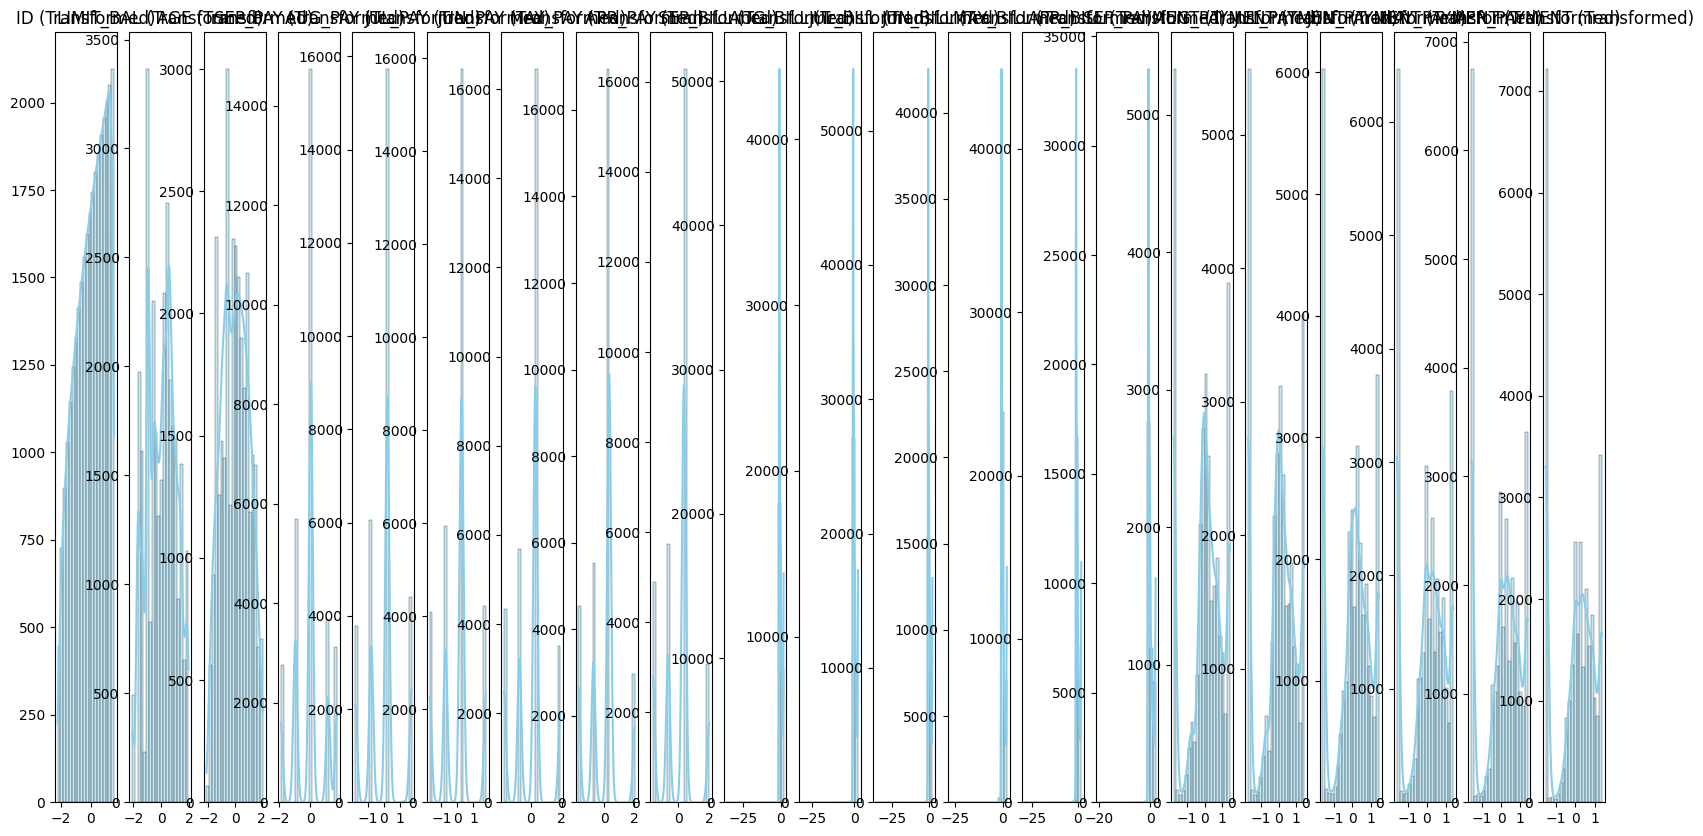

In [99]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df_transformed[col], kde=True, bins=20, color='skyblue')
    plt.title(f"{col} (Transformed)")
    plt.xlabel('')
    plt.ylabel('')

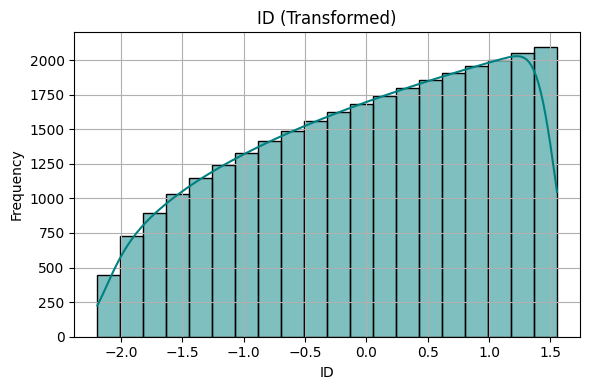

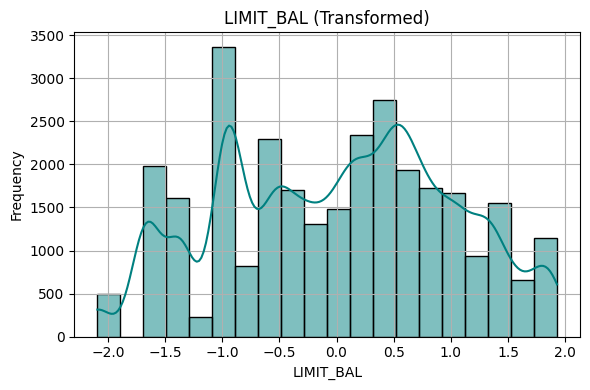

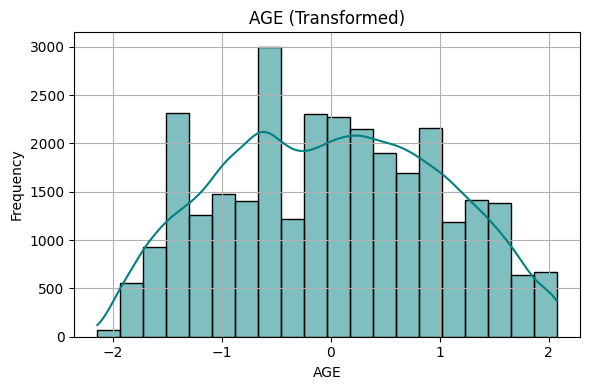

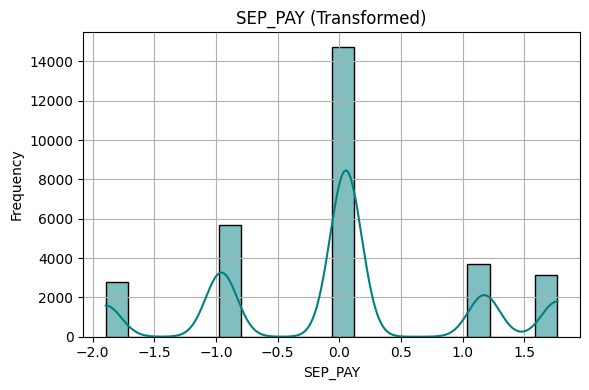

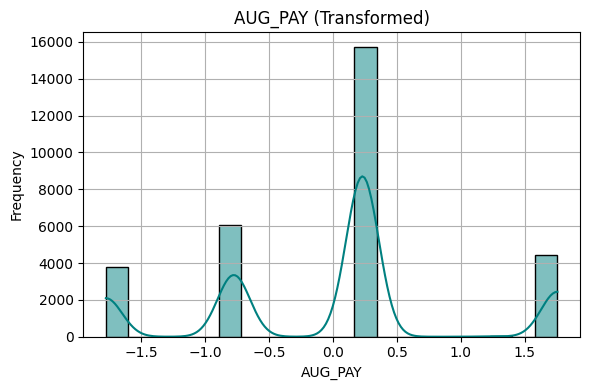

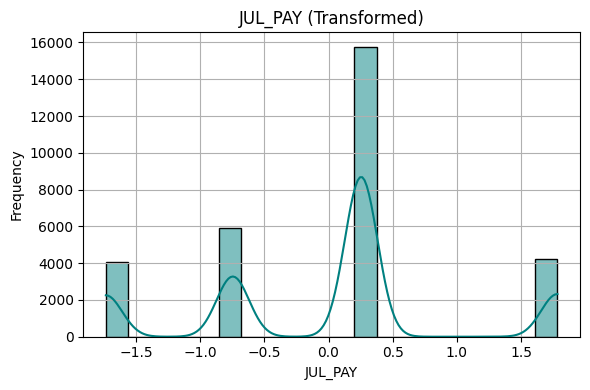

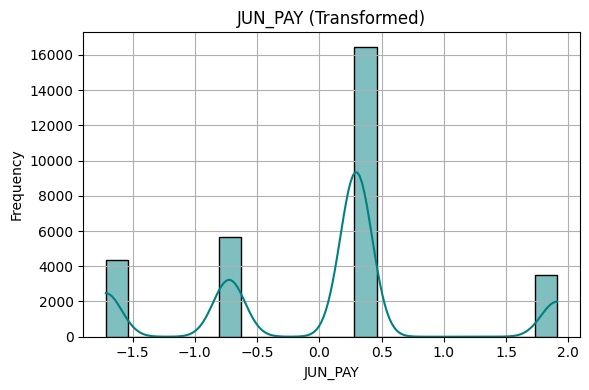

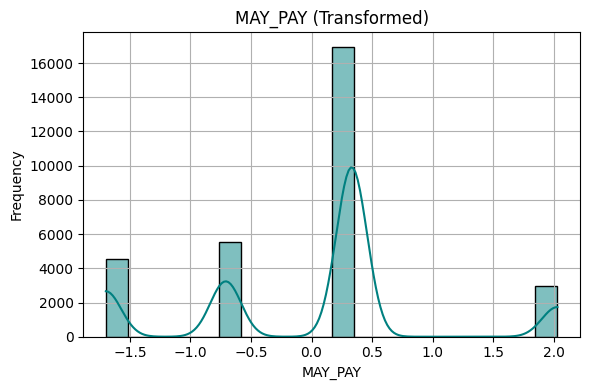

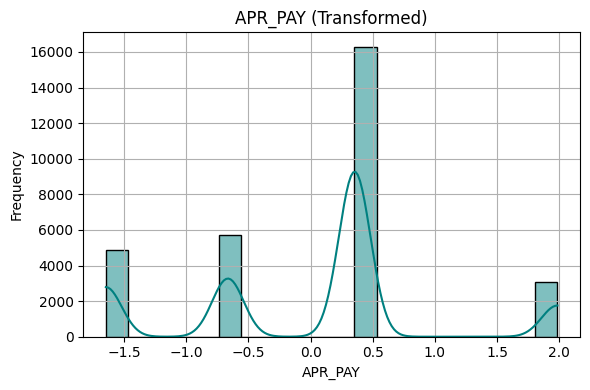

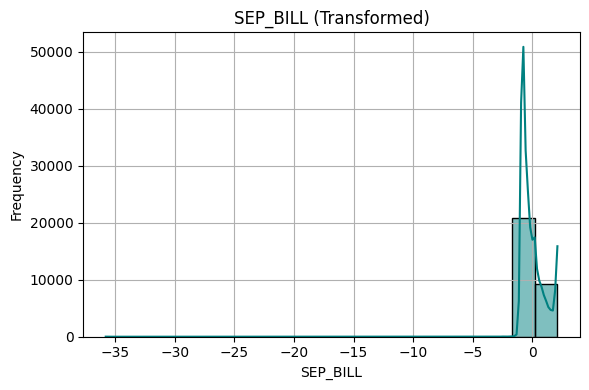

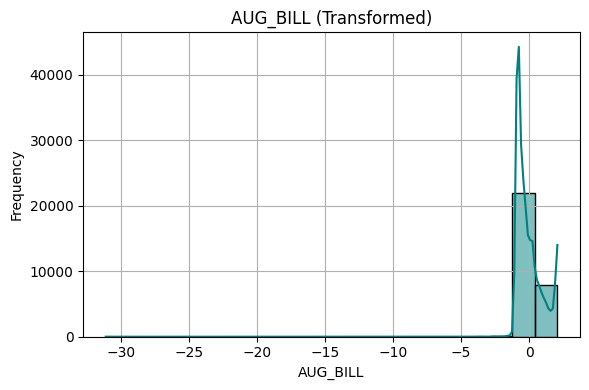

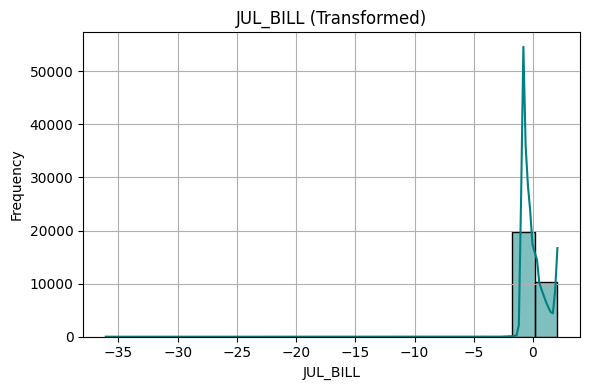

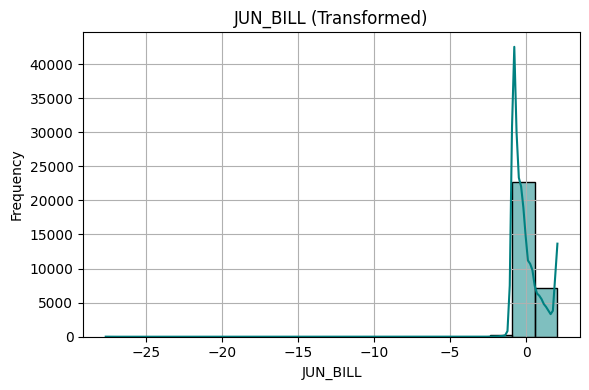

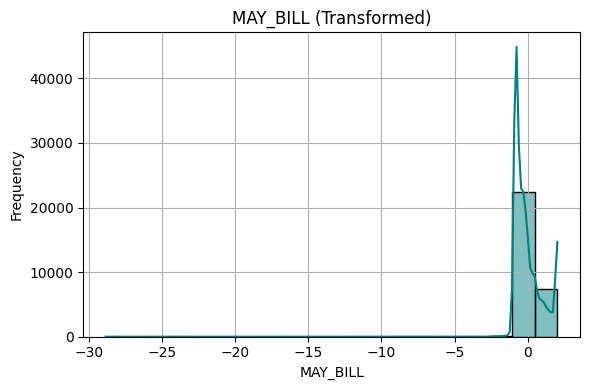

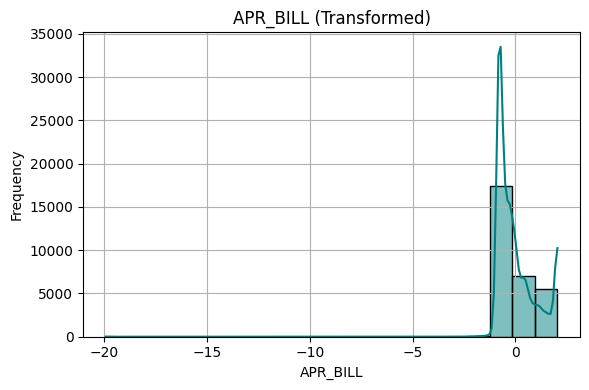

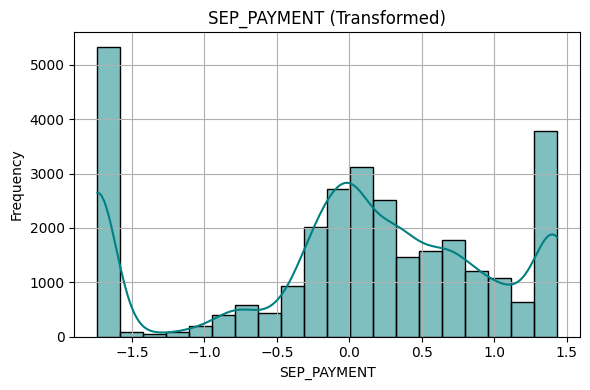

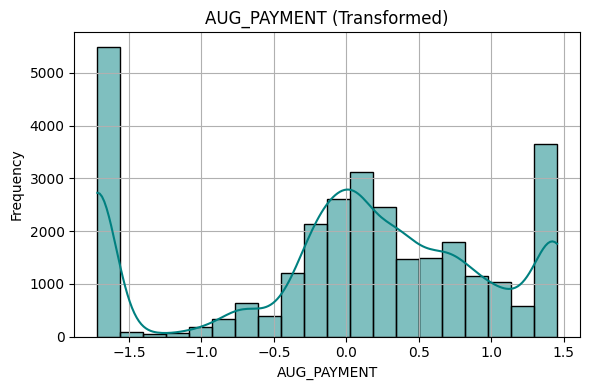

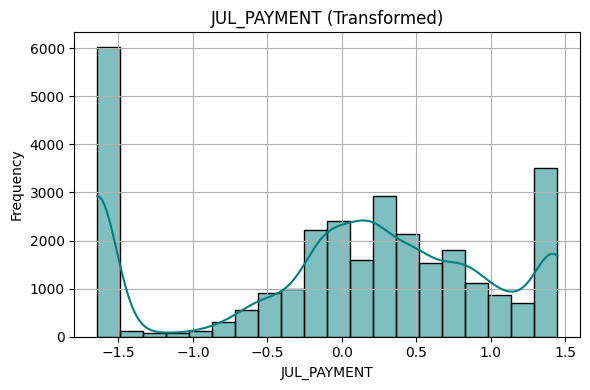

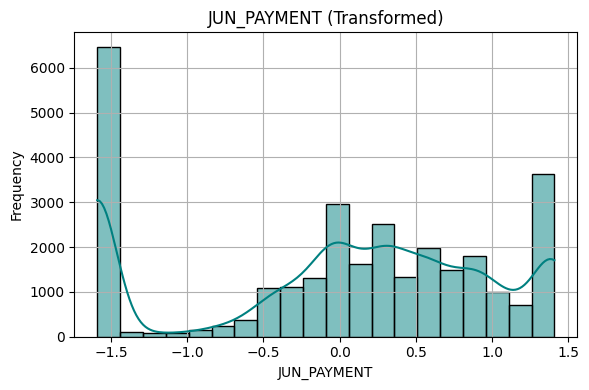

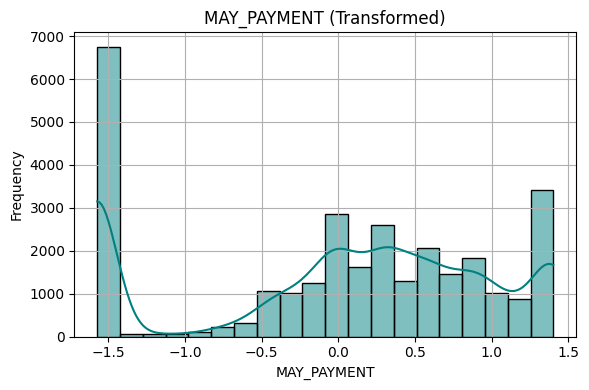

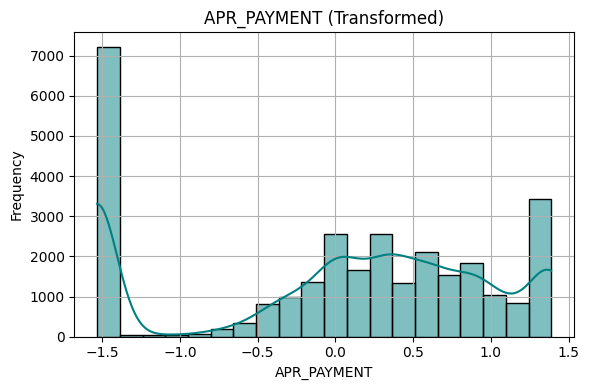

In [100]:
# Plot each column individually
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='teal')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Encoding Target Variable using LabelEncoder from Sklearn.preprocessing

In [101]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['target']=le.fit_transform(df[['target']])
df

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
0,1,20000.0,F,PG,MARRIED,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,PG,SINGLE,26.0,-1.0,1.5,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,PG,SINGLE,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,PG,MARRIED,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,PG,MARRIED,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,HIGH_SCHOOL,MARRIED,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,HIGH_SCHOOL,SINGLE,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,PG,SINGLE,37.0,1.5,1.5,1.5,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,HIGH_SCHOOL,MARRIED,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1


# Encoding using One hot Encoder from sklearn.preprocessing

In [102]:
df['EDUCATION'].value_counts()

EDUCATION
PG             14030
UG             10585
HIGH_SCHOOL     4917
M.PHIL           280
OTHERS           123
B.TECH            51
PH.D              14
Name: count, dtype: int64

In [103]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False,drop=None)
edu = ohe.fit_transform(df[['EDUCATION']])
cols= ohe.get_feature_names_out(['EDUCATION'])
df_encoded=pd.DataFrame(edu,columns=cols)
df_encoded

,EDUCATION_B.TECH,EDUCATION_HIGH_SCHOOL,EDUCATION_M.PHIL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_PH.D,EDUCATION_UG
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
29995,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29998,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [104]:
df['SEX']=le.fit_transform(df[['SEX']])
df

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
0,1,20000.0,0,PG,MARRIED,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,PG,SINGLE,26.0,-1.0,1.5,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,PG,SINGLE,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,PG,MARRIED,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,PG,MARRIED,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,HIGH_SCHOOL,MARRIED,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,HIGH_SCHOOL,SINGLE,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,PG,SINGLE,37.0,1.5,1.5,1.5,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,HIGH_SCHOOL,MARRIED,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1


In [105]:
merge=pd.concat([df.drop('EDUCATION',axis=1), df_encoded],axis=1)
merge= pd.DataFrame(merge)
merge

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,...,MAY_PAYMENT,APR_PAYMENT,target,EDUCATION_B.TECH,EDUCATION_HIGH_SCHOOL,EDUCATION_M.PHIL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_PH.D,EDUCATION_UG
0,1,20000.0,0,MARRIED,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,120000.0,0,SINGLE,26.0,-1.0,1.5,0.0,0.0,0.0,...,0.0,2000.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,90000.0,0,SINGLE,34.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,5000.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,50000.0,0,MARRIED,37.0,0.0,0.0,0.0,0.0,0.0,...,1069.0,1000.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,50000.0,1,MARRIED,57.0,-1.0,0.0,-1.0,0.0,0.0,...,689.0,679.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,MARRIED,39.0,0.0,0.0,0.0,0.0,0.0,...,5000.0,1000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29996,29997,150000.0,1,SINGLE,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29997,29998,30000.0,1,SINGLE,37.0,1.5,1.5,1.5,-1.0,0.0,...,2000.0,3100.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29998,29999,80000.0,1,MARRIED,41.0,1.0,-1.0,0.0,0.0,0.0,...,9700.0,1804.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [106]:
merge['MARRIAGE'].value_counts()

MARRIAGE
SINGLE     15964
MARRIED    13659
OTHERS       323
0             54
Name: count, dtype: int64

In [107]:
merge.replace({'MARRIAGE':{1:'MARRIED',2:'SINGLE',3:'OTHERS',0:'SINGLE'}},inplace=True)
merge

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,...,MAY_PAYMENT,APR_PAYMENT,target,EDUCATION_B.TECH,EDUCATION_HIGH_SCHOOL,EDUCATION_M.PHIL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_PH.D,EDUCATION_UG
0,1,20000.0,0,MARRIED,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,120000.0,0,SINGLE,26.0,-1.0,1.5,0.0,0.0,0.0,...,0.0,2000.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,90000.0,0,SINGLE,34.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,5000.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,50000.0,0,MARRIED,37.0,0.0,0.0,0.0,0.0,0.0,...,1069.0,1000.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,50000.0,1,MARRIED,57.0,-1.0,0.0,-1.0,0.0,0.0,...,689.0,679.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,MARRIED,39.0,0.0,0.0,0.0,0.0,0.0,...,5000.0,1000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29996,29997,150000.0,1,SINGLE,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29997,29998,30000.0,1,SINGLE,37.0,1.5,1.5,1.5,-1.0,0.0,...,2000.0,3100.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29998,29999,80000.0,1,MARRIED,41.0,1.0,-1.0,0.0,0.0,0.0,...,9700.0,1804.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [108]:
marriage = ohe.fit_transform(merge[['MARRIAGE']])
cols= ohe.get_feature_names_out(['MARRIAGE'])
df_encode=pd.DataFrame(marriage,columns=cols)
df_encode

,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
29995,1.0,0.0,0.0
29996,0.0,0.0,1.0
29997,0.0,0.0,1.0
29998,1.0,0.0,0.0


In [109]:
df1=pd.concat([merge.drop('MARRIAGE',axis=1), df_encode],axis=1)
df1

,ID,LIMIT_BAL,SEX,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,...,EDUCATION_B.TECH,EDUCATION_HIGH_SCHOOL,EDUCATION_M.PHIL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_PH.D,EDUCATION_UG,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE
0,1,20000.0,0,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,120000.0,0,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,90000.0,0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,50000.0,0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,50000.0,1,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,29997,150000.0,1,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29997,29998,30000.0,1,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29998,29999,80000.0,1,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [110]:
print('Length of Encoded clean data frame',len(df1))

Length of Encoded clean data frame 30000


# smote technique

In [111]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()


In [112]:
x_smote, y_smote = smote.fit_resample(df1[(i for i in list(df1.describe(include='all').columns) if i != 'target')], df1['target'])


In [113]:
print('length of y smote',len(y_smote))

length of y smote 46728


In [114]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df1.describe(include='all').columns) if i != 'target'))

In [115]:
balanced_df

,ID,LIMIT_BAL,SEX,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,...,EDUCATION_B.TECH,EDUCATION_HIGH_SCHOOL,EDUCATION_M.PHIL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_PH.D,EDUCATION_UG,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE
0,1,20000.0,0,24.000000,1.500000,1.500000,-1.000000,-1.000000,-2.00000,-2.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.000000
1,2,120000.0,0,26.000000,-1.000000,1.500000,0.000000,0.000000,0.00000,1.500000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,1.000000
2,3,90000.0,0,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,1.000000
3,4,50000.0,0,37.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.000000
4,5,50000.0,1,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,9377,50000.0,1,37.675410,0.783799,1.175699,1.175699,1.500000,1.50000,1.175699,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.783799,0.0,0.216201
46724,2511,30000.0,0,24.503237,1.500000,0.150971,0.150971,1.500000,1.50000,0.000000,...,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.100647,0.0,0.899353
46725,10778,130000.0,0,29.052182,-1.000000,-1.000000,-1.000000,-0.589564,0.00000,-1.000000,...,0.0,0.410436,0.0,0.0,0.000000,0.0,0.589564,0.410436,0.0,0.589564
46726,9162,470000.0,0,32.865286,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.288429,0.0,0.711571


In [116]:
balanced_df['target'] = y_smote
balanced_df

,ID,LIMIT_BAL,SEX,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,...,EDUCATION_HIGH_SCHOOL,EDUCATION_M.PHIL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_PH.D,EDUCATION_UG,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE,target
0,1,20000.0,0,24.000000,1.500000,1.500000,-1.000000,-1.000000,-2.00000,-2.000000,...,0.000000,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1
1,2,120000.0,0,26.000000,-1.000000,1.500000,0.000000,0.000000,0.00000,1.500000,...,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,1.000000,1
2,3,90000.0,0,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,1.000000,0
3,4,50000.0,0,37.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.000000,0
4,5,50000.0,1,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,9377,50000.0,1,37.675410,0.783799,1.175699,1.175699,1.500000,1.50000,1.175699,...,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.783799,0.0,0.216201,1
46724,2511,30000.0,0,24.503237,1.500000,0.150971,0.150971,1.500000,1.50000,0.000000,...,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.100647,0.0,0.899353,1
46725,10778,130000.0,0,29.052182,-1.000000,-1.000000,-1.000000,-0.589564,0.00000,-1.000000,...,0.410436,0.0,0.0,0.000000,0.0,0.589564,0.410436,0.0,0.589564,1
46726,9162,470000.0,0,32.865286,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.288429,0.0,0.711571,1


In [117]:
balanced_df['target'].value_counts()

target
1    23364
0    23364
Name: count, dtype: int64

## FEATURE SELECTION

In [118]:
from sklearn.feature_selection import SelectKBest,f_classif       #f_regressor

In [119]:
skb= SelectKBest(score_func=f_classif,k=25)
y= balanced_df['target']
X= balanced_df.drop('target', axis=1)

In [120]:
X.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'SEP_PAY', 'AUG_PAY', 'JUL_PAY',
       'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL', 'AUG_BILL', 'JUL_BILL',
       'JUN_BILL', 'MAY_BILL', 'APR_BILL', 'SEP_PAYMENT', 'AUG_PAYMENT',
       'JUL_PAYMENT', 'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT',
       'EDUCATION_B.TECH', 'EDUCATION_HIGH_SCHOOL', 'EDUCATION_M.PHIL',
       'EDUCATION_OTHERS', 'EDUCATION_PG', 'EDUCATION_PH.D', 'EDUCATION_UG',
       'MARRIAGE_MARRIED', 'MARRIAGE_OTHERS', 'MARRIAGE_SINGLE'],
      dtype='object')

In [121]:
y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: target, Length: 46728, dtype: int64

In [122]:
X_new = skb.fit_transform(X , y)

In [123]:
selected_columns= X.columns[skb.get_support()]
selected_columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'SEP_PAY', 'AUG_PAY', 'JUL_PAY', 'JUN_PAY',
       'MAY_PAY', 'APR_PAY', 'SEP_BILL', 'AUG_BILL', 'JUL_BILL', 'SEP_PAYMENT',
       'AUG_PAYMENT', 'JUL_PAYMENT', 'JUN_PAYMENT', 'MAY_PAYMENT',
       'APR_PAYMENT', 'EDUCATION_HIGH_SCHOOL', 'EDUCATION_M.PHIL',
       'EDUCATION_OTHERS', 'EDUCATION_PG', 'EDUCATION_UG', 'MARRIAGE_MARRIED',
       'MARRIAGE_SINGLE'],
      dtype='object')

# feature selection score for each columns

In [124]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': skb.scores_
}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
4,SEP_PAY,6485.964320
5,AUG_PAY,3908.131298
6,JUL_PAY,3021.399084
7,JUN_PAY,2391.981043
8,MAY_PAY,2015.768020
16,SEP_PAYMENT,1842.361088
1,LIMIT_BAL,1780.095937
17,AUG_PAYMENT,1767.241961
9,APR_PAY,1677.715721
18,JUL_PAYMENT,1445.746795


In [125]:
X_selected= X[selected_columns]
X_selected

,LIMIT_BAL,SEX,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEP_BILL,...,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,EDUCATION_HIGH_SCHOOL,EDUCATION_M.PHIL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG,MARRIAGE_MARRIED,MARRIAGE_SINGLE
0,20000.0,0,24.000000,1.500000,1.500000,-1.000000,-1.000000,-2.00000,-2.000000,3913.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000
1,120000.0,0,26.000000,-1.000000,1.500000,0.000000,0.000000,0.00000,1.500000,2682.000000,...,1000.000000,0.000000,2000.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,1.000000
2,90000.0,0,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,29239.000000,...,1000.000000,1000.000000,5000.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,1.000000
3,50000.0,0,37.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,46990.000000,...,1100.000000,1069.000000,1000.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000
4,50000.0,1,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.00000,0.000000,8617.000000,...,9000.000000,689.000000,679.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,50000.0,1,37.675410,0.783799,1.175699,1.175699,1.500000,1.50000,1.175699,16197.238154,...,1697.319157,129.720361,891.899699,0.000000,0.0,0.0,1.000000,0.000000,0.783799,0.216201
46724,30000.0,0,24.503237,1.500000,0.150971,0.150971,1.500000,1.50000,0.000000,29932.470715,...,0.000000,1105.224244,1317.471438,1.000000,0.0,0.0,0.000000,0.000000,0.100647,0.899353
46725,130000.0,0,29.052182,-1.000000,-1.000000,-1.000000,-0.589564,0.00000,-1.000000,326.000000,...,820.872747,2665.419588,518.197742,0.410436,0.0,0.0,0.000000,0.589564,0.410436,0.589564
46726,470000.0,0,32.865286,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,162389.375000,...,8842.347095,6847.254461,9297.461356,0.000000,0.0,0.0,1.000000,0.000000,0.288429,0.711571


# SCALING (0-1)
- Standard scaler(0-1)
- Min-Max scaler 

In [126]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_scaled= ss.fit_transform(X_selected)
X_scaled

array([[-1.07112641e+00, -6.93462258e-01, -1.33041028e+00, ...,
        -7.49439878e-01,  1.13600648e+00, -1.11026170e+00],
       [-2.69413769e-01, -6.93462258e-01, -1.10071974e+00, ...,
        -7.49439878e-01, -9.95916764e-01,  1.01923100e+00],
       [-5.09927562e-01, -6.93462258e-01, -1.81957559e-01, ...,
        -7.49439878e-01, -9.95916764e-01,  1.01923100e+00],
       ...,
       [-1.89242505e-01, -6.93462258e-01, -7.50191079e-01, ...,
         5.67996808e-01, -1.20897919e-01,  1.45209739e-01],
       [ 2.53658048e+00, -6.93462258e-01, -3.12274092e-01, ...,
        -7.49439878e-01, -3.81008957e-01,  4.05024232e-01],
       [ 3.71956345e-01, -6.93462258e-01,  1.01618776e+00, ...,
        -7.49439878e-01,  2.22127871e-02,  2.26218910e-03]],
      shape=(46728, 25))

# Training and testing

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [128]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('y_train Shape:',y_train.shape)
print('y_test Shape:',y_test.shape)

X_train Shape: (37382, 25)
X_test Shape: (9346, 25)
y_train Shape: (37382,)
y_test Shape: (9346,)


In [129]:
y.value_counts()    

target
1    23364
0    23364
Name: count, dtype: int64

# SMOTE TECHNIQUE--- MAKE IT BEFORE FEATURE SELECTION -- TO MAKE DATA BALANCED
- oversampling--- increase row size
- undersampling---decrease row size

## Logistic Regression


In [130]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [131]:
y_pred_lr= lr.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [133]:
accuracy= accuracy_score(y_test, y_pred_lr)
accuracy

0.6817890006419859

In [134]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68      4610
           1       0.69      0.68      0.68      4736

    accuracy                           0.68      9346
   macro avg       0.68      0.68      0.68      9346
weighted avg       0.68      0.68      0.68      9346



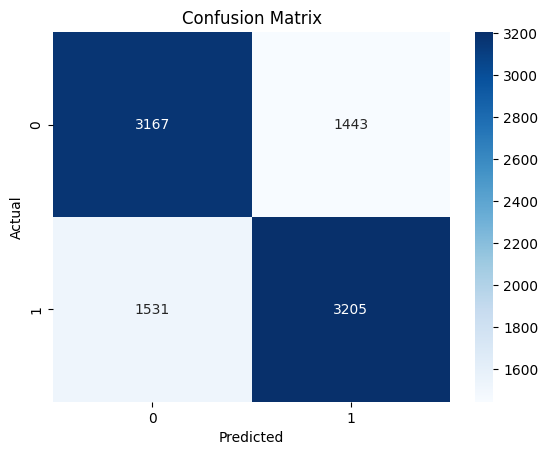

In [135]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Gaussian Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [137]:
y_pred_nb= gnb.predict(X_test)

In [138]:
accuracy_nb= accuracy_score(y_test, y_pred_nb)
accuracy_nb

0.6326770811042157

In [139]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.43      0.54      4610
           1       0.60      0.83      0.70      4736

    accuracy                           0.63      9346
   macro avg       0.65      0.63      0.62      9346
weighted avg       0.65      0.63      0.62      9346



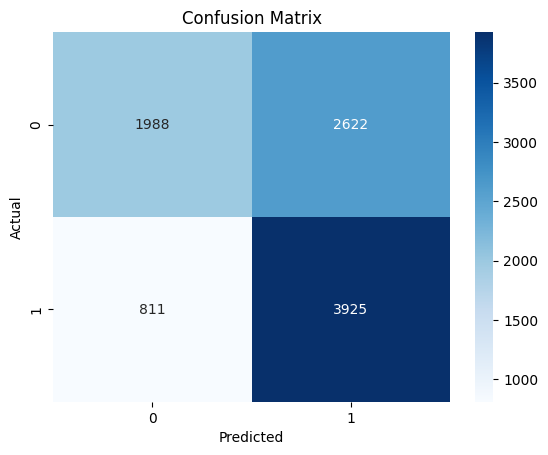

In [140]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## DecisionTreeClassifier

In [141]:
from sklearn.tree import DecisionTreeClassifier
de=DecisionTreeClassifier()
de.fit(X_train,y_train)

DecisionTreeClassifier()

In [142]:
y_pred_de=de.predict(X_test)

In [143]:
accuracy= accuracy_score(y_test, y_pred_de)
accuracy

0.8106141664883373

In [144]:
print("\n Classification Report: \n " , classification_report(y_test, y_pred_de))


 Classification Report: 
                precision    recall  f1-score   support

           0       0.81      0.81      0.81      4610
           1       0.81      0.82      0.81      4736

    accuracy                           0.81      9346
   macro avg       0.81      0.81      0.81      9346
weighted avg       0.81      0.81      0.81      9346



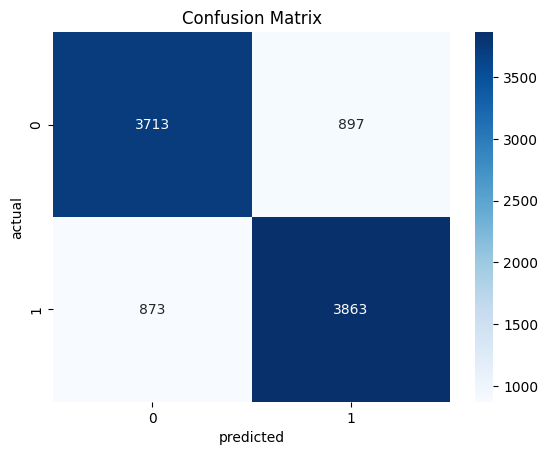

In [145]:
#confusion matrix
conf_matrix= confusion_matrix(y_test, y_pred_de)
#plotting using heatmap
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title("Confusion Matrix")
plt.show()

## Support Vector Classifier

In [146]:
svc= SVC()
svc.fit(X_train, y_train)

SVC()

In [147]:
y_pred_svc= svc.predict(X_test)

In [148]:
accuracy= accuracy_score(y_test, y_pred_svc)
accuracy

0.8212069334474642

In [149]:
print('\n Classification Report: \n', classification_report(y_test, y_pred_svc))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.91      0.83      4610
           1       0.89      0.74      0.81      4736

    accuracy                           0.82      9346
   macro avg       0.83      0.82      0.82      9346
weighted avg       0.83      0.82      0.82      9346



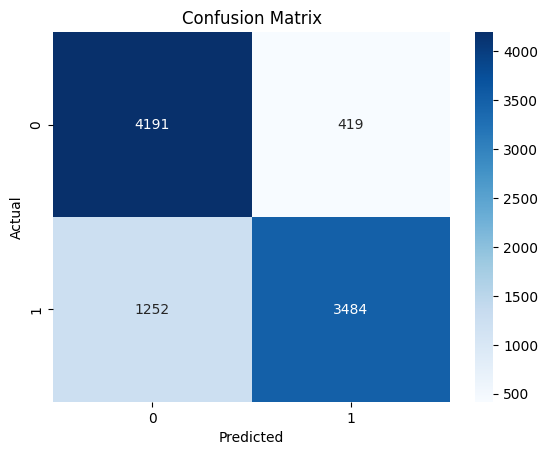

In [150]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()